In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    file = "ISL_CSLRT_Corpus/Frames_Word_Level/AFRAID/AFRAID (1).jpg"

    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
        pass
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
        print('hand_landmarks:', hand_landmarks)
        print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
        mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
        # cv2.imshow("sdc",annotated_image)
    cv2.imwrite(
        '/tmp/annotated_image' + '.jpg', cv2.flip(annotated_image, 1))
    if not results.multi_hand_world_landmarks:
        pass
        

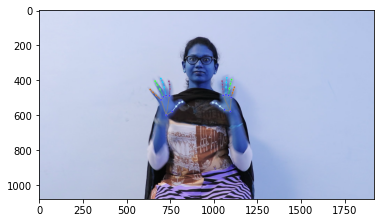

In [2]:
import matplotlib.pyplot as plt
plt.imshow(annotated_image)

Run this 1st

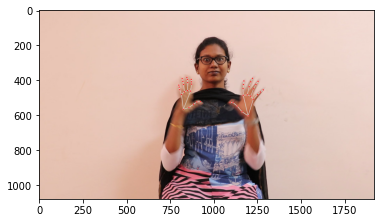

In [1]:
import numpy as np
import cv2
import mediapipe as mp
import PIL
import matplotlib.pyplot as plt
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    
def extract_keypoints(results):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh,rh])

with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5) as hands:
    image = cv2.imread("ISL_CSLRT_Corpus/Frames_Word_Level/AFRAID/AFRAID (1).jpg")
    results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    draw_landmarks(image,results)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

In [46]:
import os
data_path = "trial_data"
data = os.path.join(data_path)
actions = ["ANGRY","AFRAID","AGREE","CLASS","COLD","COME"]
# actions = ["CLASS"]
for action in actions:
    os.makedirs(os.path.join(data,action))

run this 2nd

In [2]:
actions = ["are you free today\nक्या तुम आज उपलब्ध हो", 
            "can i help you\nक्या मैं आपकी मदद कर सकता हूं", 
            "go and sleep\nजाओ सो जाओ"]

data = os.path.join("trial_sentence_data")

x = lambda a: a.split("\n")[0]

for action in actions:
    if not os.path.exists(os.path.join(data, x(action))):
        os.makedirs(os.path.join(data, x(action)))


In [5]:
img_lst = os.path.join("ISL_CSLRT_Corpus","Frames_Sentence_Level","are you free today", "3")
print(os.listdir(img_lst))

['free 01.jpg', 'free 02.jpg', 'free 03.jpg', 'free 04.jpg', 'free 05.jpg', 'free 06.jpg', 'free 07.jpg', 'free 08.jpg', 'free 09.jpg', 'free 10.jpg', 'free 11.jpg', 'free 12.jpg', 'free 13.jpg', 'free 14.jpg', 'free 15.jpg', 'free 16.jpg', 'free 17.jpg', 'free 18.jpg', 'free 19.jpg', 'free 20.jpg', 'free 21.jpg', 'free 22.jpg', 'free 23.jpg', 'free 24.jpg', 'free 25.jpg', 'free 26.jpg', 'free 27.jpg', 'free 28.jpg', 'free 29.jpg', 'free 30.jpg', 'free 31.jpg', 'free 32.jpg', 'free 33.jpg', 'free 34.jpg', 'free 35.jpg', 'free 36.jpg', 'free 37.jpg', 'free 38.jpg', 'free 39.jpg', 'free 40.jpg', 'free 41.jpg', 'free 42.jpg', 'Thumbs.db']


In [4]:
no_sequences = 7

for action in actions:
    img_lst = os.path.join("ISL_CSLRT_Corpus","Frames_Sentence_Level",action)
    cnt=0
    for image in os.listdir(img_lst):
        with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5) as hands:
            image = cv2.imread(os.path.join(img_lst,image))
            results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
            draw_landmarks(image,results)
        a = extract_keypoints(results)
        path = os.path.join("trial_sentence_data",action,str(cnt))
        np.save(path,a)
        cnt = cnt+1
        

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'ISL_CSLRT_Corpus\\Frames_Sentence_Level\\are you free today\nक्या तुम आज उपलब्ध हो'

In [3]:
for action in actions:
    clip_lst = os.path.join("ISL_CSLRT_Corpus","Frames_Sentence_Level",action)
    # print(img_lst)
    for clip_no in os.listdir(clip_lst):
        img_lst = os.path.join(clip_lst, clip_no)
        cnt = 0
        for image in os.listdir(img_lst):
            if image.endswith("db"):
                continue
            with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5) as hands:
                image = cv2.imread(os.path.join(img_lst,image))
                results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
                draw_landmarks(image,results)
            a = extract_keypoints(results)
            path = os.path.join("trial_sentence_data",action,str(cnt))
            np.save(path,a)
            cnt = cnt+1

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'ISL_CSLRT_Corpus\\Frames_Sentence_Level\\are you free today\nक्या तुम आज उपलब्ध हो'

In [6]:
from tensorflow.keras.utils import to_categorical

label_map = {label:num for num,label in enumerate(actions)}
label_map

{'are you free today\nक्या तुम आज उपलब्ध हो': 0,
 'can i help you\nक्या मैं आपकी मदद कर सकता हूं': 1,
 'go and sleep\nजाओ सो जाओ': 2}

In [7]:
import numpy as np
sequence , labels = [],[]
no_sequences = 30

for action in actions:
    file_name = x(action)
    for frame_num in range(no_sequences):
        res = np.load(os.path.join("trial_sentence_data",file_name,"{}.npy".format(frame_num)))
        sequence.append(res)
        labels.append(label_map[action])

In [8]:
np.array(sequence).shape

(90, 126)

In [9]:
y = to_categorical(labels).astype(int)

In [10]:
X = np.array(sequence)
X.shape

(90, 126)

In [11]:
X_CNN = np.array(sequence)
X_CNN.shape

(90, 126)

In [12]:
X = X.reshape(X.shape[0],1,X.shape[1])
X.shape

(90, 1, 126)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D
from tensorflow.keras.callbacks import TensorBoard

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [14]:
model = Sequential()

model.add(LSTM(64,return_sequences=True,activation="relu",input_shape=(1,126)))
# model.add(Dropout(0.2))

model.add(LSTM(128,return_sequences=True,activation="relu"))
# model.add(Dropout(0.2))

model.add(LSTM(64,return_sequences=False,activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(16,activation="relu"))

model.add(Dense(3,activation="softmax"))

In [28]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['categorical_accuracy'])

In [14]:
model.fit(X,y,epochs=200,callbacks = [tb_callback])

Epoch 1/200
3/3 [==============================] - 5s 106ms/step - loss: 1.0986 - categorical_accuracy: 0.2778
Epoch 2/200
3/3 [==============================] - 0s 49ms/step - loss: 1.0985 - categorical_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 0s 67ms/step - loss: 1.0983 - categorical_accuracy: 0.3333
Epoch 4/200
3/3 [==============================] - 0s 85ms/step - loss: 1.0977 - categorical_accuracy: 0.3333
Epoch 5/200
3/3 [==============================] - 0s 45ms/step - loss: 1.0970 - categorical_accuracy: 0.3333
Epoch 6/200
3/3 [==============================] - 0s 49ms/step - loss: 1.0954 - categorical_accuracy: 0.3333
Epoch 7/200
3/3 [==============================] - 0s 56ms/step - loss: 1.0936 - categorical_accuracy: 0.3333
Epoch 8/200
3/3 [==============================] - 0s 45ms/step - loss: 1.0898 - categorical_accuracy: 0.3333
Epoch 9/200
3/3 [==============================] - 0s 51ms/step - loss: 1.0834 - categorical_accuracy: 0.3333
Epoch 10/

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             48896     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 5

In [16]:
model.save('ISL_Translator_model.h5')

In [93]:
model_CNN = Sequential()

model_CNN.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding='same',input_shape= (126,90,1)))
# model.add(Dropout(0.2))

model_CNN.add(Conv2D(128,kernel_size=(3,3),activation="relu", padding='same'))
# model.add(Dropout(0.2))

model_CNN.add(Conv2D(64,kernel_size=(3,3),activation="relu", padding='same'))
# model.add(Dropout(0.2))

model_CNN.add(Dense(64,activation="relu"))

model_CNN.add(Dense(32,activation="relu"))

model_CNN.add(Dense(16,activation="relu"))

model_CNN.add(Dense(3,activation="softmax"))

In [94]:
model_CNN.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['categorical_accuracy'])

In [99]:
X_CNN.reshape(126,90,1).shape

(126, 90, 1)

In [96]:
model_CNN.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 90, 64)       640       
                                                                 
 conv2d_29 (Conv2D)          (None, 126, 90, 128)      73856     
                                                                 
 conv2d_30 (Conv2D)          (None, 126, 90, 64)       73792     
                                                                 
 dense_36 (Dense)            (None, 126, 90, 64)       4160      
                                                                 
 dense_37 (Dense)            (None, 126, 90, 32)       2080      
                                                                 
 dense_38 (Dense)            (None, 126, 90, 16)       528       
                                                                 
 dense_39 (Dense)            (None, 126, 90, 3)      

In [100]:
model_CNN.fit(X_CNN,y,epochs=200,callbacks = [tb_callback])

Epoch 1/200


ValueError: in user code:

    File "c:\Users\krish\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\krish\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\krish\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\krish\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\krish\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\krish\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_22" (type Sequential).
    
    Input 0 of layer "conv2d_28" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 126)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 126), dtype=float32)
      • training=True
      • mask=None


run this last

In [6]:
import cv2
from tensorflow.keras.models import load_model
import mediapipe as mp
from PIL import ImageDraw, ImageFont, Image
import matplotlib.pyplot as plt

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

sequence=[]
sentence=[]
threshold = 0.4

hindi_font = ImageFont.truetype('ARIALUNI.TTF', 26)

def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

model = load_model('ISL_Translator_model.h5')

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while(True):
        ret, frame = cap.read()
        image,results = mediapipe_detection(frame,holistic)
        
        draw_landmarks(image,results)
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-1:]
        if len(sequence) == 1:
            res = model.predict(np.expand_dims(sequence,axis=0))[0]
            # print(actions[np.argmax(res)])
        
#         cv2.putText(img=image, text=actions[np.argmax(res)], fontFace = cv2.FONT_HERSHEY_SIMPLEX, org=(40,70),thickness=2,fontScale = 1.0,
#   color = (255, 0, 0))
        pil_image = Image.fromarray(image)
        draw = ImageDraw.Draw(pil_image)
        draw.text((40, 70), text=actions[np.argmax(res)], font=hindi_font, fill=(153,0,255,1))
        concat = cv2.hconcat([frame, image, np.array(pil_image)])
        cv2.namedWindow('Sign Language Detection', cv2.WINDOW_NORMAL)
        cv2.imshow('Sign Language Detection', concat)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()